# Word2Vec - trenowanie modelu na liczbach

In [2]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

/home/cherit/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/cherit/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/cherit/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Dane

In [38]:
sentences = []

for i in range(100000):
    start = np.random.randint(0,20)
    finish = start + np.random.randint(1,10)
    sencence = [ str(x) for x in range(start, finish)]
    sentences.append(sencence)
    

# Model Word2Vec

In [11]:
model = Word2Vec(sentences, size=10, window=2, min_count=1)

In [12]:
model.wv['1']

array([-5.3530188 , -0.04913354, -2.8927712 ,  0.30932438, -4.928569  ,
        1.0829598 , -0.19682965, -0.5737051 , -1.8434173 ,  0.28505912],
      dtype=float32)

In [17]:
def plot_heatmap(model):
    plt.figure(figsize=(15,8))
    sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5)

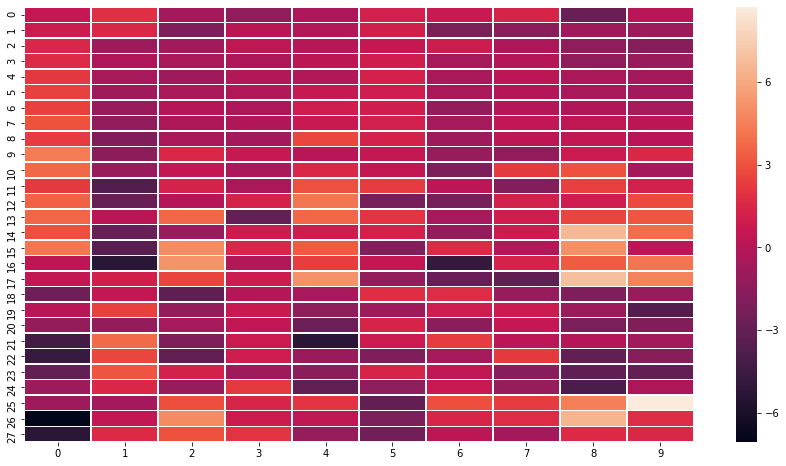

In [18]:
plot_heatmap(Word2Vec(sentences, size=10, window=2, min_count=1))

# PCA

In [27]:
def plot_pca(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)
    words = list(model.wv.vocab)
    plt.scatter(result[:,0], result[:,1])
    for i,word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0],result[i, 1]))

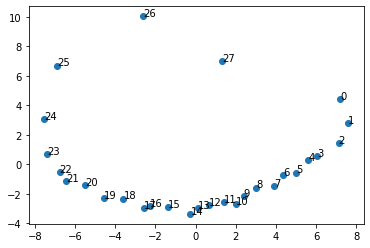

In [28]:
plot_pca(model)

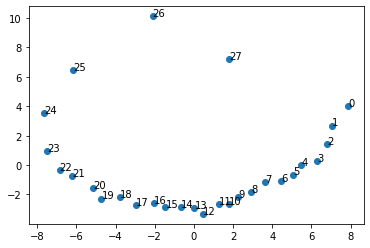

In [29]:
plot_pca(Word2Vec(sentences, size=10, window=2, min_count=1))

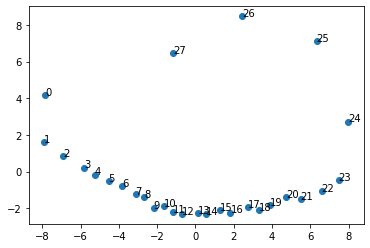

In [30]:
plot_pca(Word2Vec(sentences, size=100, window=2, min_count=1))

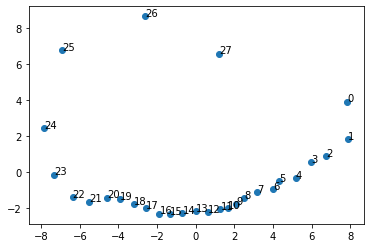

In [31]:
plot_pca(Word2Vec(sentences, size=1000, window=2, min_count=1))

# Podobne słowa

In [39]:
model = Word2Vec(sentences, size=300, window=5)

In [35]:
model.wv.most_similar('4', topn=3)

[('0', 0.40784239768981934),
 ('1', 0.34585052728652954),
 ('2', 0.1931532323360443)]

In [40]:
model.wv.most_similar(positive=['10','8'], negative=['5'], topn=3)

[('12', 0.3835946321487427),
 ('13', 0.34988710284233093),
 ('11', 0.345981240272522)]